In [1]:
import pickle
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [30]:
fr = open("5percent/logistic_model.sav", "rb")
logistic = pickle.load(fr)
print(logistic)

LogisticRegression(C=0.1, random_state=0)


In [ ]:
logistic.coef_.shape

In [ ]:
logistic.intercept_

In [31]:
fr = open("5percent/elastic_model.sav", "rb")
elastic = pickle.load(fr)
print(elastic)
print(elastic.coef_)
print(elastic.intercept_)

ElasticNet(alpha=0.0, l1_ratio=0.056411579027100256, normalize=False,
           random_state=0)
[ 0.         -4.13405931 17.86291106 -0.44467307 -0.18438056  0.07420646
 -3.20116862 -0.98184489]
4.875771339435231


In [32]:
coef = [elastic.intercept_]+list(elastic.coef_[1:])
coef_df = pd.DataFrame(columns = ['variable','coef'])
coef_df['variable'] = ['constant', 'lwd', 'lwu', 'me', 'rf', 'sf', 'st2', 'swd']
coef_df['coef'] = coef
coef_df

,variable,coef
0,constant,4.875771
1,lwd,-4.134059
2,lwu,17.862911
3,me,-0.444673
4,rf,-0.184381
5,sf,0.074206
6,st2,-3.201169
7,swd,-0.981845


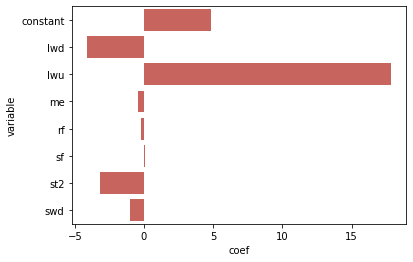

In [33]:
sns.barplot("coef", y="variable", data=coef_df, color = sns.xkcd_rgb["pale red"]);

In [26]:
from xgboost import plot_importance
fr = open("5percent/xgboost_model.sav", "rb")
XGBoost = pickle.load(fr)
print(XGBoost)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.18182496720710062, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=2, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=27, reg_alpha=0, reg_lambda=1, ...)


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

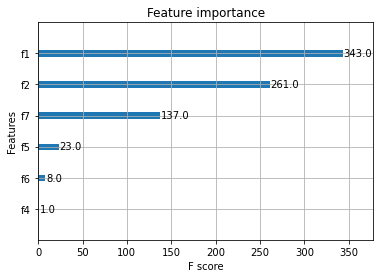

In [29]:
plot_importance(XGBoost)#.set_yticklabels()

In [34]:
XGBoost.feature_importances_

array([0.        , 0.7135608 , 0.27910638, 0.        , 0.00190975,
       0.00133972, 0.00116771, 0.00291565], dtype=float32)

In [41]:
imp_df = pd.DataFrame(columns = ['variable','importance'])
imp_df['variable'] = ['constant', 'lwd', 'lwu', 'me', 'rf', 'sf', 'st2', 'swd']
imp_df['importance'] = XGBoost.feature_importances_
imp_df

,variable,importance
0,constant,0.000000
1,lwd,0.713561
2,lwu,0.279106
3,me,0.000000
4,rf,0.001910
5,sf,0.001340
6,st2,0.001168
7,swd,0.002916


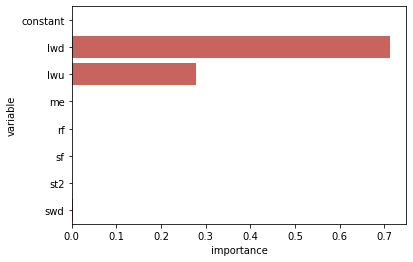

In [43]:
sns.barplot("importance", y="variable", data=imp_df, color = sns.xkcd_rgb["pale red"]);

In [19]:
XGBoost.get_booster().get_score(importance_type= 'gain')

{'f1': 4024867.0,
 'f2': 1574310.125,
 'f4': 10772.0,
 'f5': 7556.763671875,
 'f6': 6586.51904296875,
 'f7': 16445.833984375}